## **Convolutional Neural Network**

In [1]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfull

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

from PIL import Image
from numpy import asarray
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

In [28]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=32, image_size=(160,160))
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=32, image_size=(160,160))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [4]:
IMG_SHAPE = IMG_SIZE + (3,)
MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')

MobileNetV2.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [5]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.layers.Rescaling(1./127.5, offset=-1)(inputs)
x = MobileNetV2(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

myModel = tf.keras.Model(inputs, outputs)

In [6]:
base_learning_rate = 0.0001
myModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [7]:
loss0, accuracy0 = myModel.evaluate(validation_dataset)

32/32 [==============================] - 28s 746ms/step - loss: 0.8785 - accuracy: 0.4740


In [8]:
initial_epochs = 5
history = myModel.fit(train_dataset, epochs=initial_epochs, validation_data=validation_dataset)

Epoch 1/5
63/63 [==============================] - 50s 752ms/step - loss: 0.6735 - accuracy: 0.6165 - val_loss: 0.5144 - val_accuracy: 0.7770
Epoch 2/5
63/63 [==============================] - 52s 833ms/step - loss: 0.4296 - accuracy: 0.8415 - val_loss: 0.3546 - val_accuracy: 0.9050
Epoch 3/5
63/63 [==============================] - 50s 792ms/step - loss: 0.3085 - accuracy: 0.9175 - val_loss: 0.2670 - val_accuracy: 0.9450
Epoch 4/5
63/63 [==============================] - 50s 797ms/step - loss: 0.2399 - accuracy: 0.9455 - val_loss: 0.2148 - val_accuracy: 0.9550
Epoch 5/5
63/63 [==============================] - 52s 824ms/step - loss: 0.1966 - accuracy: 0.9560 - val_loss: 0.1806 - val_accuracy: 0.9620


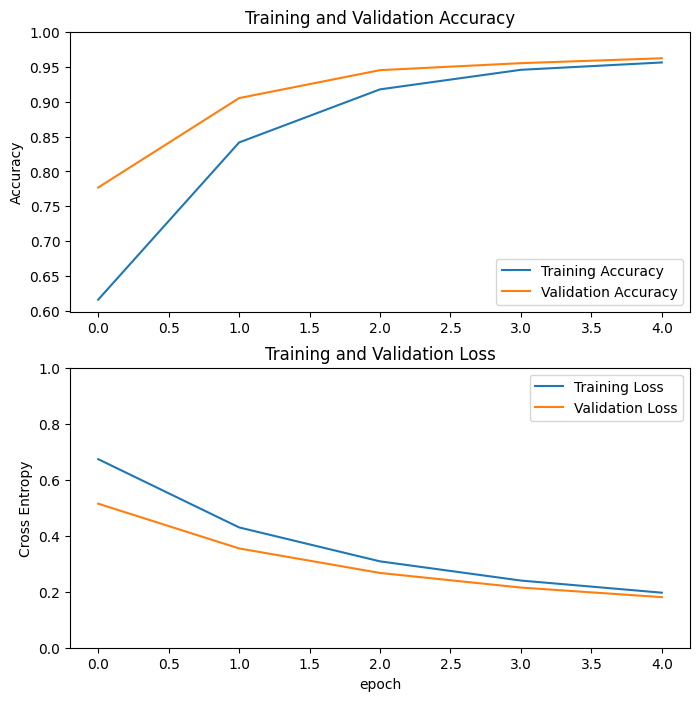

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

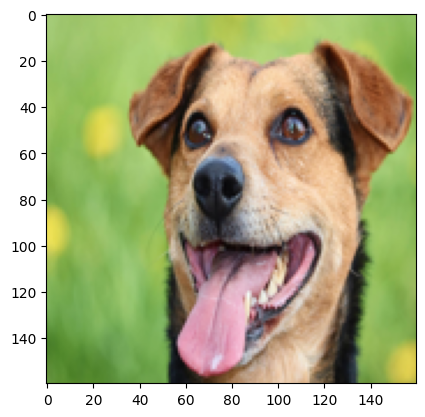

In [29]:
img = Image.open('ajg.jpg')
img = img.convert('RGB')
img = img.resize((160, 160))
img = asarray(img)

plt.imshow(img)

In [30]:
img=np.expand_dims(img, axis=0)

In [32]:
prediksi=myModel(img)

In [33]:
p=np.round(prediksi)

In [34]:
p

array([[1.]], dtype=float32)